<a href="https://colab.research.google.com/github/arthireddy14/Machine_Learning/blob/main/randomforest_socialnetwork_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


The goal is to predict wheather the person will buy the product or not

In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy score is :",accuracy)
print("Classification report ",classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix ",cm)

Accuracy score is : 0.85
Classification report                precision    recall  f1-score   support

           0       0.87      0.90      0.89        52
           1       0.81      0.75      0.78        28

    accuracy                           0.85        80
   macro avg       0.84      0.83      0.83        80
weighted avg       0.85      0.85      0.85        80

Confusion matrix  [[47  5]
 [ 7 21]]


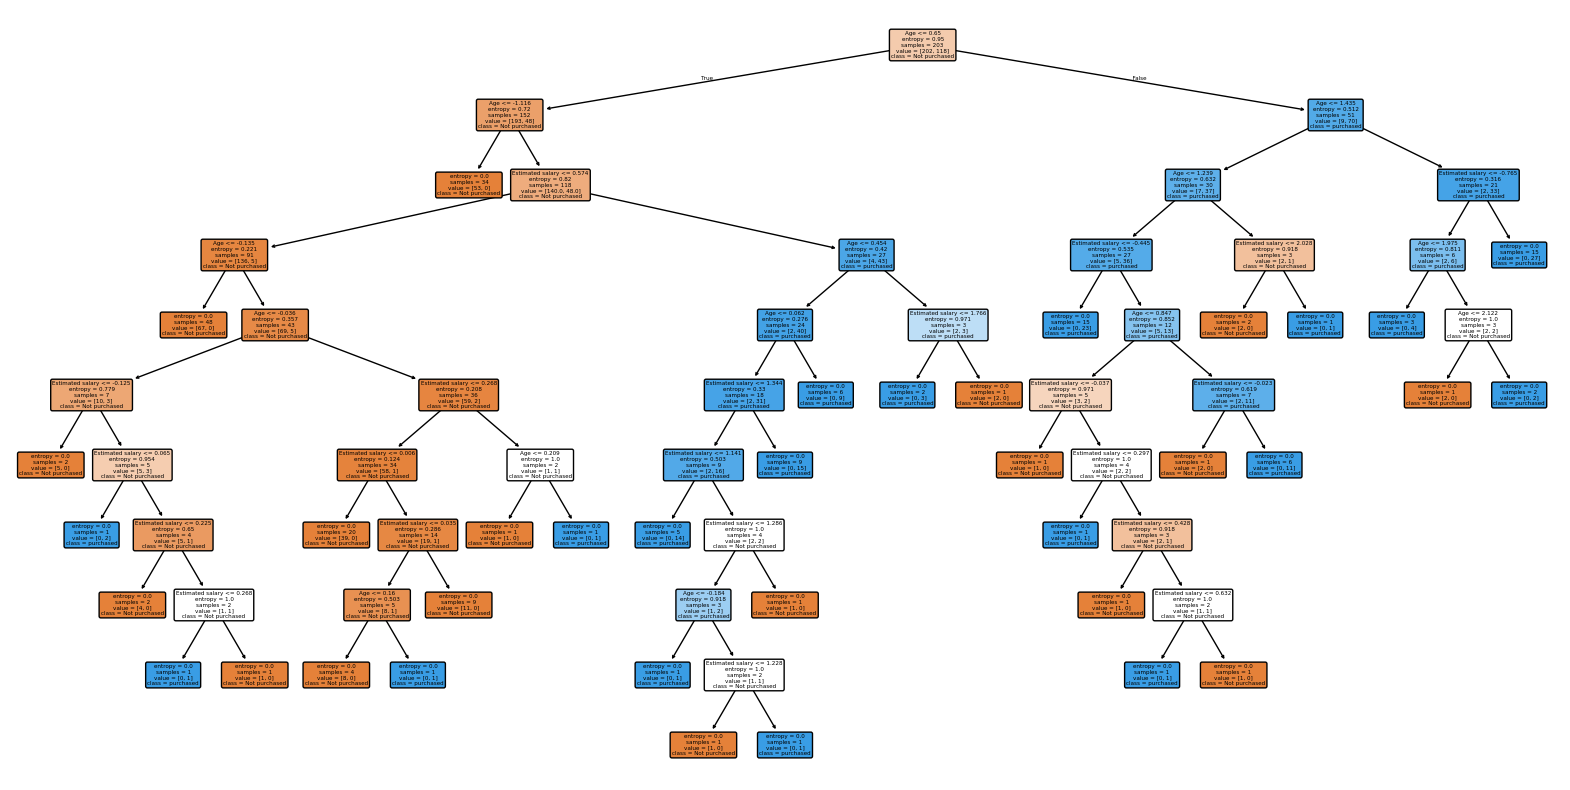

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
single_tree=classifier.estimators_[0]
# first tree
plt.figure(figsize=(20,10))
plot_tree(
    single_tree,
    feature_names=["Age","Estimated salary"],
    class_names=["Not purchased","purchased"],
    filled=True,
    rounded=True
)
plt.show()